# Diabetic Prediction using decision tree model 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt



**Reading our dataset and basic infos**

In [8]:
data= pd.read_csv('diabetes.csv')
df= pd.DataFrame(data)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Checking for any missing values or duplicated values**

In [9]:
print(df.isna().sum())
df.isna().duplicated().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


np.int64(767)

**Checking whether the data types match our expected features**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Training the model**

In [11]:
x= df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]
y= df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

tree= DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Feature importances:", tree.feature_importances_)

Predictions: [1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
Accuracy: 0.7402597402597403
Feature importances: [0.01490738 0.56868269 0.04125926 0.         0.02971722 0.20039652
 0.14503693]


**Plotting the tree**

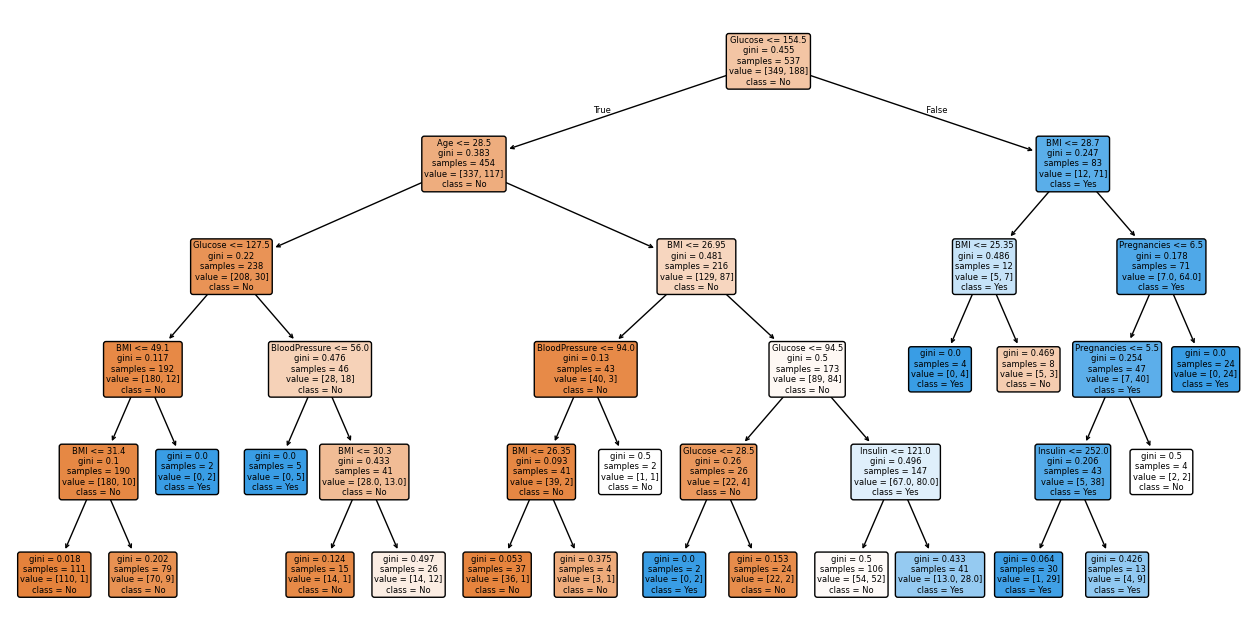

In [12]:
plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=x.columns , class_names=['No','Yes'],filled=True, rounded=True,fontsize=6)
plt.show()

# Conclusion: Our tree hit a ceiling accuracy of 74% for this dataset. Since its a single tree, the accuracy is expected. It can be further improved with ensemble methods like random forests or XGBoosted trees.